In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [ ]:
del df['User ID']

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Gender','Age','EstimatedSalary']].values 
y = df['Purchased'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8464285714285714  Cross val score :  0.8392857142857142
Depth  :  2  Training Accuracy :  0.925  Cross val score :  0.9214285714285715
Depth  :  3  Training Accuracy :  0.9285714285714286  Cross val score :  0.9178571428571429
Depth  :  4  Training Accuracy :  0.9357142857142857  Cross val score :  0.9071428571428571
Depth  :  5  Training Accuracy :  0.95  Cross val score :  0.8642857142857142
Depth  :  6  Training Accuracy :  0.975  Cross val score :  0.8678571428571429
Depth  :  7  Training Accuracy :  0.9821428571428571  Cross val score :  0.8642857142857142
Depth  :  8  Training Accuracy :  0.9928571428571429  Cross val score :  0.8785714285714284
Depth  :  9  Training Accuracy :  0.9928571428571429  Cross val score :  0.8714285714285713
Depth  :  10  Training Accuracy :  0.9928571428571429  Cross val score :  0.8785714285714284


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train) 
importance = dt.feature_importances_
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[76  9]
 [ 4 31]]


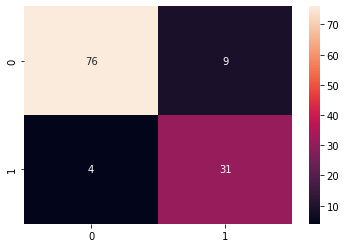

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


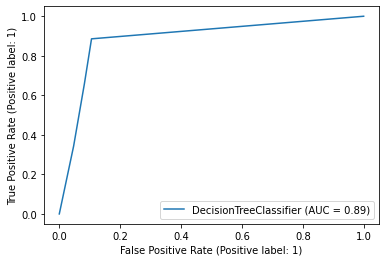

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

**Visualising the Training set results**

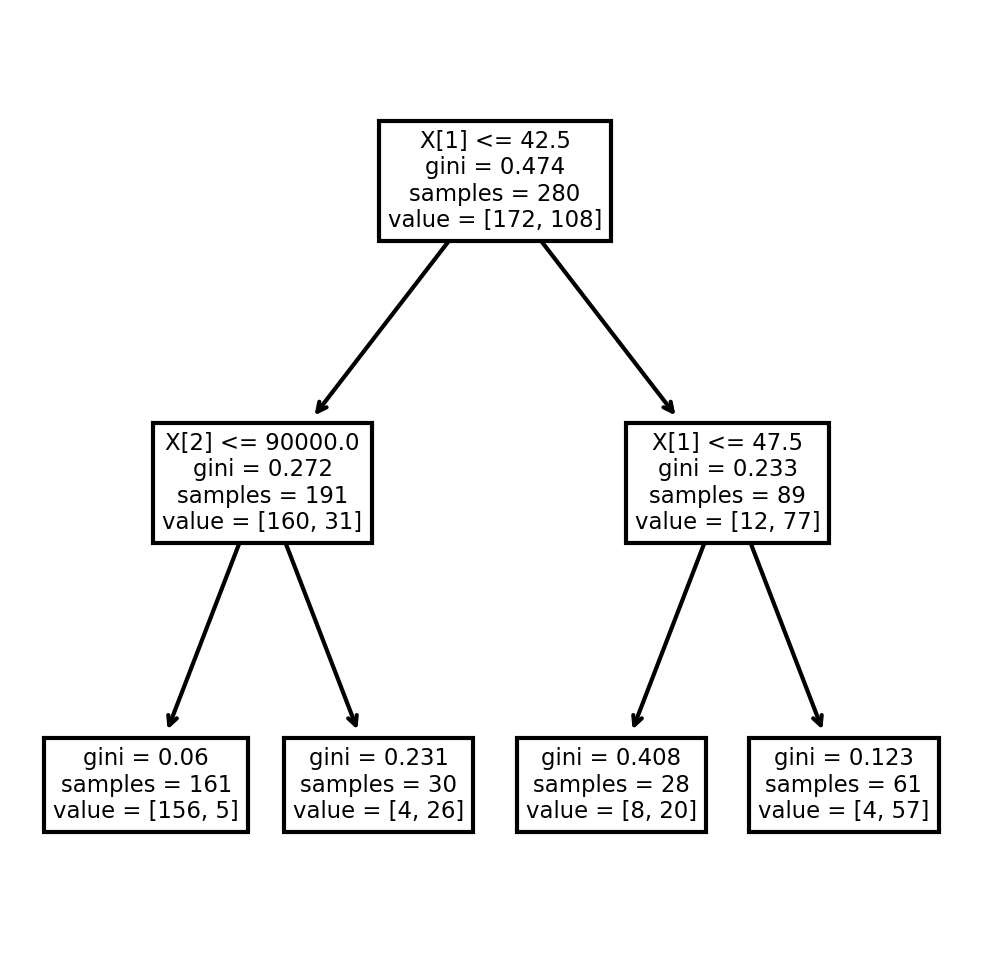

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt.fit(X_train,y_train));
fig.savefig('imagename.png')

**Visualising the Test set results**

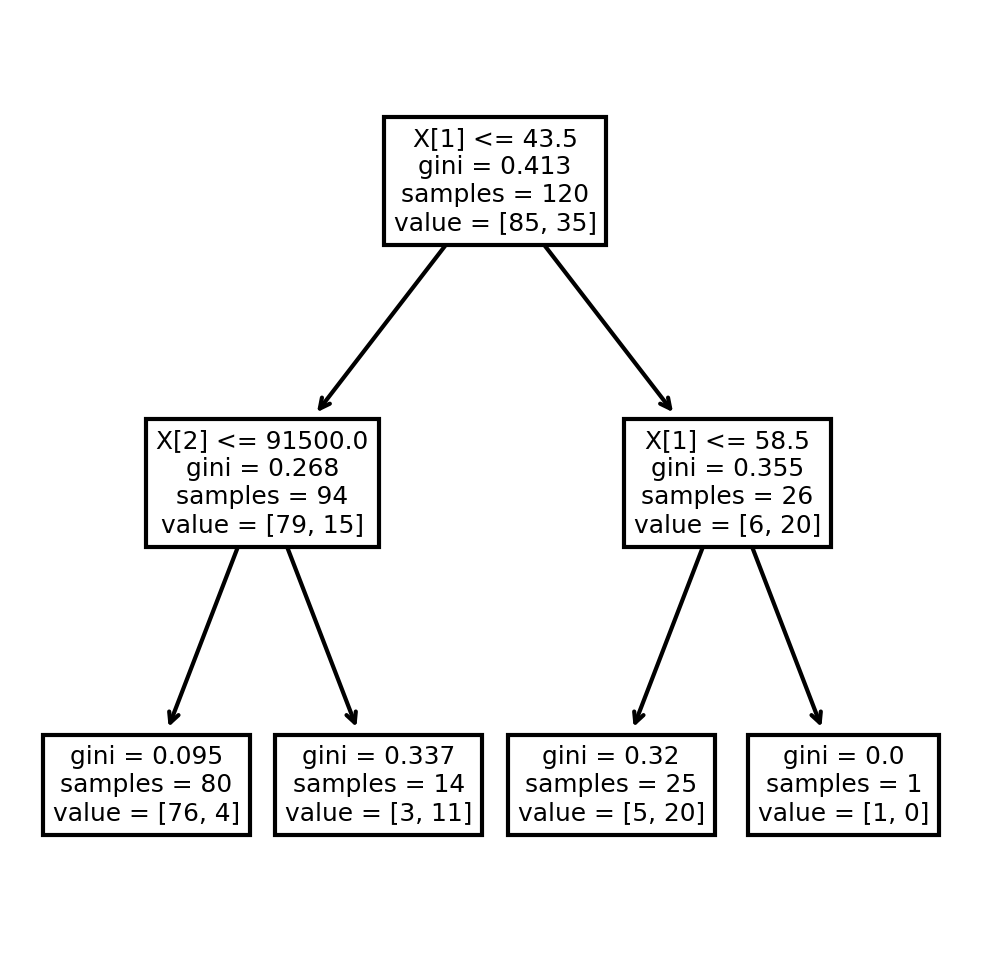

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt.fit(X_test,y_test));
fig.savefig('imagename.png')